In [157]:
#Importação das Bibliotecas
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt,modf
import math
from datetime import datetime

In [158]:
!pip install wget
!wget https://raw.githubusercontent.com/JdrNc/repositorioCienciaDeDados/main/gata2.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-28 17:40:34--  https://raw.githubusercontent.com/JdrNc/repositorioCienciaDeDados/main/gata2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61011 (60K) [text/plain]
Saving to: ‘gata2.csv.3’

gata2.csv.3         100%[===================>]  59.58K  --.-KB/s    in 0.01s   

2022-10-28 17:40:34 (5.21 MB/s) - ‘gata2.csv.3’ saved [61011/61011]



In [159]:
dataframe = pd.read_csv("gata2.csv.3", sep=',')

dataframe.head()

,iso_code,iso_code.1,date,new_deaths_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,excess_mortality,excess_mortality_cumulative_per_million
0,BRA,South America,2/26/2020,0.0,0,0,0,0.0,0.00,0.000000
1,BRA,South America,2/27/2020,0.0,0,0,0,0.0,0.00,0.000000
2,BRA,South America,2/28/2020,0.0,0,0,0,0.0,0.00,0.000000
3,BRA,South America,2/29/2020,0.0,0,0,0,0.0,3.12,11.326659
4,BRA,South America,3/1/2020,0.0,0,0,0,0.0,0.00,0.000000


In [160]:
#Inicio da Covid(Antes das vacinas)
dataframe = dataframe.drop(columns=['iso_code','iso_code.1'])

print(type(dataframe['date'][0]))


#dataframe = dataframe[(dataframe['date'] > "26/02/2020") & dataframe['date'] < "17/01/2021") ]

dataframe.head()

<class 'str'>


,date,new_deaths_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,excess_mortality,excess_mortality_cumulative_per_million
0,2/26/2020,0.0,0,0,0,0.0,0.00,0.000000
1,2/27/2020,0.0,0,0,0,0.0,0.00,0.000000
2,2/28/2020,0.0,0,0,0,0.0,0.00,0.000000
3,2/29/2020,0.0,0,0,0,0.0,3.12,11.326659
4,3/1/2020,0.0,0,0,0,0.0,0.00,0.000000


In [161]:
dataframe['date'] = pd.to_datetime(dataframe['date']).dt.normalize()

selecao = (dataframe['date'] >= '2020-02-26') & (dataframe['date'] <= '2021-01-17')

dataframe_filtrado = dataframe[selecao]

print(type(dataframe_filtrado['date'][0]))
datas = dataframe_filtrado[['date']]
novas_mortes = dataframe_filtrado[['new_deaths']]
datas.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,date
0,2020-02-26
1,2020-02-27
2,2020-02-28
3,2020-02-29
4,2020-03-01


In [162]:
datas_teste,datas_treino,novas_mortes_teste,novas_mortes_treino = train_test_split(datas,novas_mortes,train_size=0.2,random_state = 42)

datas_treino.head()

,date
231,2020-10-14
110,2020-06-15
250,2020-11-02
9,2020-03-06
93,2020-05-29


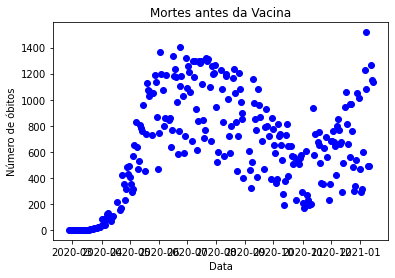

In [163]:
plt.scatter(datas_treino, novas_mortes_treino, color = "blue")
plt.title("Mortes antes da Vacina")
plt.xlabel("Data")
plt.ylabel("Número de óbitos")
plt.show()

In [146]:
selecao02 = (dataframe['date'] >= '2021-01-17')

dataframe_filtrado02 = dataframe[selecao02]

dataframe_filtrado02 = dataframe_filtrado02.dropna()


In [147]:
#Normalizando os Dados

dataframe_normalizado = dataframe_filtrado02.copy() 
for column in dataframe_normalizado.columns: 
    dataframe_normalizado[column] = (dataframe_normalizado[column] - dataframe_normalizado[column].min()) / (dataframe_normalizado[column].max() - dataframe_normalizado[column].min())

datas_depois = dataframe_normalizado[['date']]
total_vacinado = dataframe_normalizado[['total_vaccinations']]
novas_mortes_depois = dataframe_normalizado[['new_deaths']]


In [148]:
total_vacinado_teste,total_vacinado_treino,novas_mortes_teste,novas_mortes_treino = train_test_split(total_vacinado,novas_mortes_depois,train_size=0.2,random_state = 42)

total_vacinado_treino_seq = np.linspace(total_vacinado_treino.min(),total_vacinado_treino.max(),971).reshape(-1,1)

total_vacinado_treino.head()

,total_vaccinations
958,0.999917
693,0.738731
811,0.000000
616,0.594436
398,0.046396


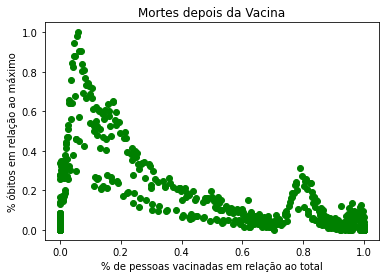

In [155]:
plt.scatter(total_vacinado_treino, novas_mortes_treino, color = "green")
plt.title("Mortes depois da Vacina")
plt.xlabel("% de pessoas vacinadas em relação ao total")
plt.ylabel("% óbitos em relação ao máximo" )
plt.show()

In [150]:
modelo = make_pipeline(PolynomialFeatures(11,include_bias = False),LinearRegression())

modelo.fit(total_vacinado_treino, novas_mortes_treino)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=11, include_bias=False)),
                ('linearregression', LinearRegression())])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


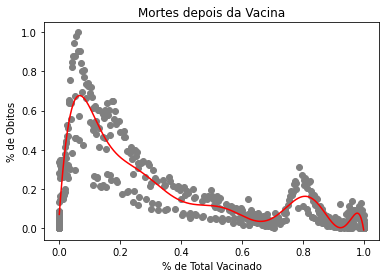

In [153]:
plt.scatter(total_vacinado_treino, novas_mortes_treino, color = "gray")
plt.plot(total_vacinado_treino_seq,modelo.predict(total_vacinado_treino_seq),color="red")
plt.title("Mortes depois da Vacina")
plt.xlabel("% de Total Vacinado")
plt.ylabel("% de Obitos")
plt.show()